# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Юрьев Сергей, вариант 37.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to \infty$.

## Основные теоретические положения

Линейная однородная система с периодическими коэффициентами - это система ОЛДУ следующего вида:

$X' = A(t)X,\ A(t + T) = A(t), t \ge 0$
(1)

Матрица\
$\Phi(t) = \{\phi_{ij}, i, j = 1, 2, ..., n \}$\
называется <b>фундаментальной матрицей</b> системы (1), если все её столбцы являются линейно независимыми решениями этой системы.

Матрица $C$, удовлетворяющая условию\
$\Phi(t + T) = \Phi(t)C, \forall t \ge 0$,\
называется <b>основной</b> для фундаментальной матрицы $\Phi(t)$.

<b>Спектральным радиусом</b> матрицы $A$ называется максимум модуля её собственных чисел:\
$\rho(A) = max|\lambda_j|, 0 \le j \le n$

## Постановка задачи

Дано дифференциальное уравнение:

$x'' + a(p, t)x = 0, a(p, t) = p + b(t), b(t + T) = b(t)$,

где $p$ – параметр.

Данное уравнение сводится к системе двух уравнений $1$-го порядка:

$\begin{cases}
    u_1' = u_2\\
    u_2' = -a(p, t)u_1
 \end{cases}$
 
Здесь

$u_1(t) = x(t), u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения.

## Выполнение работы

$b(t) = exp(2\sin t)$

$a(p, t) = p + exp(2\sin t)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import pi, sin, e

p_cur = None
def f(t, Y):
    return [Y[1], -(p_cur + e**(2*sin(t)))*Y[0]]

p_range = np.arange(0.0, 5.0, 0.05)
radius = []
p_0 = None

V_1 = (1, 0)
V_2 = (0, 1)

T = 2*pi
t = np.arange(0.0, T, T/100)

Значения p меняются от 0 до 5 с шагом 0.05. Для каждого p находится решение однородного линейного уравнения, после чего вычисляется спектральный радиус основной матрицы, которая представляет собой решение системы при t = T.

Значения спектрального радиуса, отображённые на графике, позволяют установить, на каких интервалах исходное уравнение устойчиво.

p_0: 4.3500000000000005


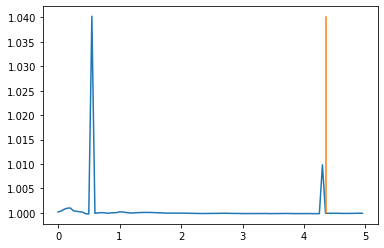

In [2]:
def plot(p_ran, values):
    global p_cur
    for p in p_ran:
        p_cur = p
        solution_1 = solve_ivp(f, (0, T), V_1, t_eval=t)
        solution_2 = solve_ivp(f, (0, T), V_2, t_eval=t)
        U_1 = [solution_1.y[0][-1], solution_1.y[1][-1]]
        U_2 = [solution_2.y[0][-1], solution_2.y[1][-1]]
        C = np.matrix([U_1, U_2]).transpose()
        spectral_radius = np.max(np.abs(np.linalg.eigvals(C)))
        values.append(spectral_radius)
        
plot(p_range, radius)

i = len(radius) - 1
while radius[i] <= 1:
    i -= 1
p_0 = p_range[i + 1]

print("p_0:", p_0)

radius = np.array(radius)
plt.plot(p_range, radius)
plt.plot([p_0, p_0], [1.0, 1.04])
plt.show()

Из графика видно, что уравнение приходит в устойчивое состояние В точке p=4.35. Если увеличить диапазон значений p, значение точки останется прежним:

p_0: 4.3500000000000005


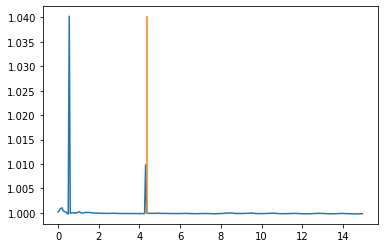

In [3]:
p_range = np.arange(0.0, 15.0, 0.05)
radius = []
plot(p_range, radius)

i = len(radius) - 1
while radius[i] <= 1:
    i -= 1
p_0 = p_range[i + 1]

print("p_0:", p_0)

radius = np.array(radius)
plt.plot(p_range, radius)
plt.plot([p_0, p_0], [1.0, 1.04])
plt.show()

## Выводы

Изучена устойчивость линейного ОДУ с периодическими коэффициентами. Исходное уравнение сведено к системе двух ОДУ первого порядка, после чего найдено её решение, фундаментальная и основная матрицы. Значения спектральных радиусов основных матриц при изменяющемся p отображены на графике. Из полученных данных можно сделать вывод о значении p, при котором уравнение переходит в зону устойчивости.